In [8]:
pip install requests pandas



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import requests
import pandas as pd

# List of Ensembl gene IDs
gene_list = [
"ENSG00000143546",
"ENSG00000116741",
"ENSG00000122862",
"ENSG00000132475",
"ENSG00000105835",
"ENSG00000185201",
"ENSG00000163220",
"ENSG00000163563",
"ENSG00000163041",
"ENSG00000132965"

]

# g:Profiler API endpoint
url = "https://biit.cs.ut.ee/gprofiler/api/gost/profile/"

# Request payload
payload = {
    "organism": "hsapiens",  # Human
    "query": gene_list,
    "sources": ["GO:BP", "KEGG", "REAC"],  # Gene Ontology (BP), KEGG, Reactome
    "user_threshold": 0.05,  # p-value cutoff
}

# Make API request
response = requests.post(url, json=payload)

# Check response
if response.status_code == 200:
    data = response.json()["result"]
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Save to CSV
    df.to_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_results_cls0.csv", index=False)
    
    # Display top results
    print(df.head())

else:
    print("Error:", response.status_code, response.text)


                                         description  effective_domain_size  \
0  "The adhesion of one neutrophil to one or more...                  21017   
1  "The process of binding or confining zinc ions...                  21017   
2  "Any process that activates or increases the f...                  21017   
3  "Any process that modulates the frequency, rat...                  21017   
4  "The process in which a cell irreversibly incr...                  21017   

   goshv  intersection_size  \
0  26298                  2   
1  17523                  2   
2  16911                  4   
3  10497                  5   
4  15230                  5   

                                       intersections  \
0  [[IDA, IBA], [], [], [], [], [], [IDA, IBA], [...   
1     [[TAS], [], [], [], [], [], [TAS], [], [], []]   
2  [[TAS], [], [], [IMP], [], [], [TAS], [], [IMP...   
3  [[TAS], [IEA], [], [IMP], [], [], [TAS], [], [...   
4  [[TAS], [IEA], [], [IMP], [], [], [TAS], [], [...   

 

In [12]:
pip install gseapy pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.7/524.7 kB 9.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import gseapy as gp
import pandas as pd

# List of Ensembl gene IDs (convert to gene symbols if needed)
gene_list = [
    "SOD2", "RPL9P9", "MTATP6P1", "MFN1", "HSPA1A", "HSP90AA1", "AC093525.2",
    "FAM198A", "MT-ND6"
]

# Perform enrichment analysis using Enrichr
enr = gp.enrichr(gene_list=gene_list, gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2021'],
                 organism='Human', outdir=None)

# Convert to DataFrame and save results
df = enr.results
df.to_csv("/Users/mennayoussef/Downloads/enrichr_enrichment_results.csv", index=False)

# Display top results
print(df.head())


          Gene_set                                         Term Overlap  \
0  KEGG_2021_Human                    Lipid and atherosclerosis   3/215   
1  KEGG_2021_Human          Antigen processing and presentation    2/78   
2  KEGG_2021_Human                 Longevity regulating pathway   2/102   
3  KEGG_2021_Human                   Estrogen signaling pathway   2/137   
4  KEGG_2021_Human  Protein processing in endoplasmic reticulum   2/171   

    P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0  0.000098          0.002845            0                     0   46.648585   
1  0.000531          0.007700            0                     0   74.868421   
2  0.000906          0.008756            0                     0   56.831429   
3  0.001625          0.011780            0                     0   42.023280   
4  0.002515          0.013592            0                     0   33.511412   

   Combined Score                 Genes  
0      430.541685  HSP90AA

In [15]:
pip install matplotlib seaborn wordcloud pandas



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_85627/3760496275.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")


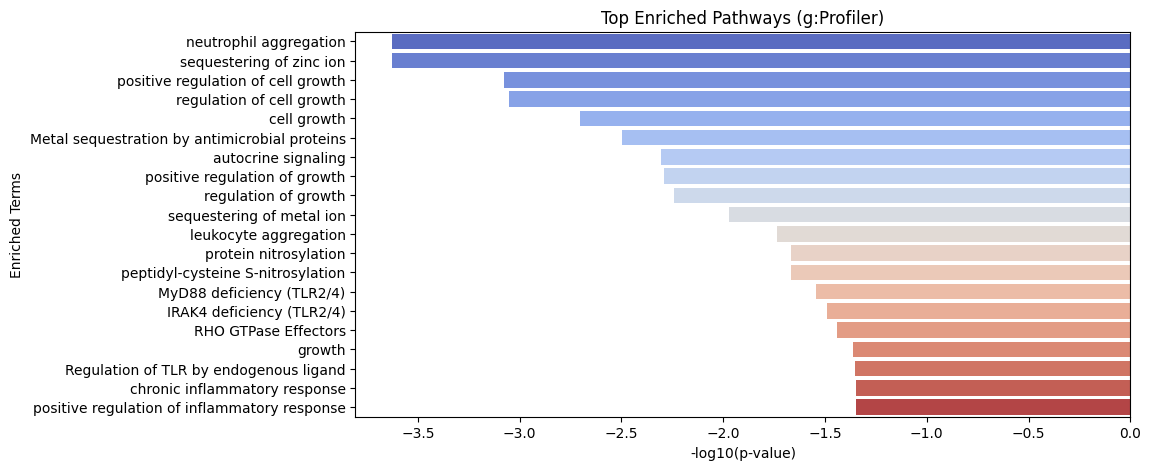

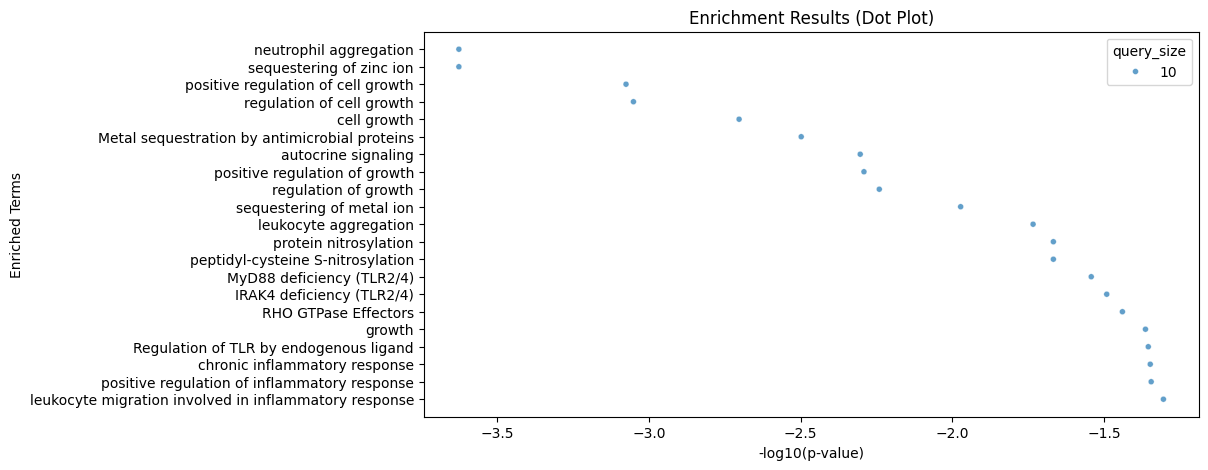

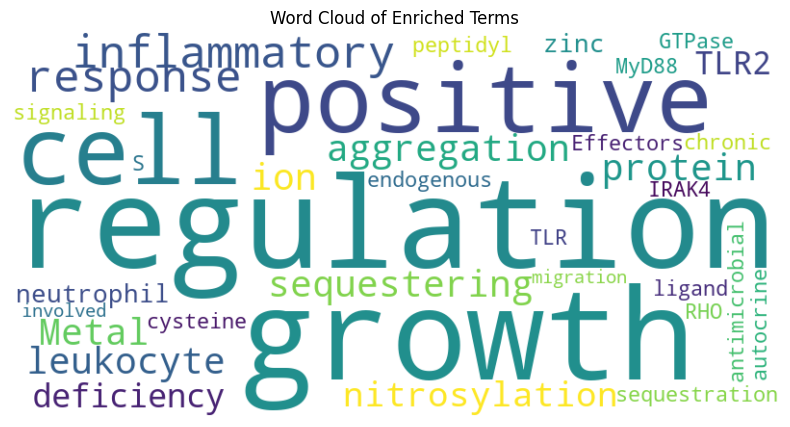

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load g:Profiler results
df = pd.read_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_results_cls0.csv")

# Sort by adjusted p-value (smallest first)
df = df.sort_values(by="p_value")

# Select top 10 terms
top_terms = df.head(20)

# **Bar Plot for Top Enriched Terms**
plt.figure(figsize=(10, 5))
sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")
plt.xlabel("-log10(p-value)")
plt.ylabel("Enriched Terms")
plt.title("Top Enriched Pathways (g:Profiler)")
plt.show()

# **Dot Plot for Enrichment Scores**
plt.figure(figsize=(10, 5))
sns.scatterplot(x=-df["p_value"].apply(lambda x: -1 * np.log10(x)), y=df["name"], size=df["query_size"], alpha=0.7)
plt.xlabel("-log10(p-value)")
plt.ylabel("Enriched Terms")
plt.title("Enrichment Results (Dot Plot)")
plt.show()

# **Word Cloud of Enriched Terms**
text = " ".join(df["name"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Enriched Terms")
plt.show()


/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_85627/1330938835.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_terms["Adjusted P-value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["Term"], palette="viridis")


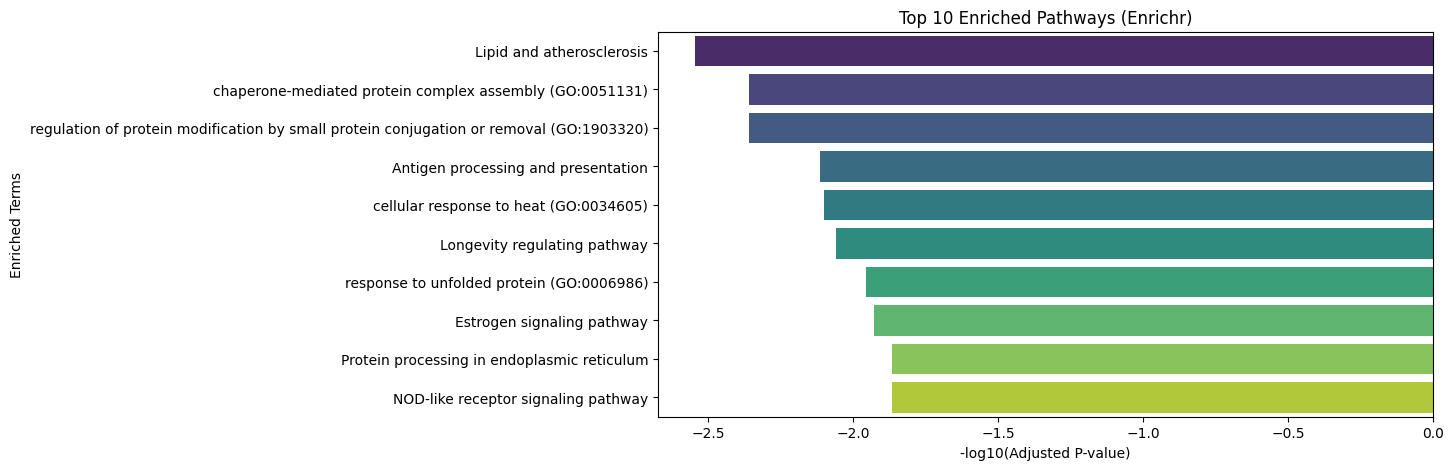

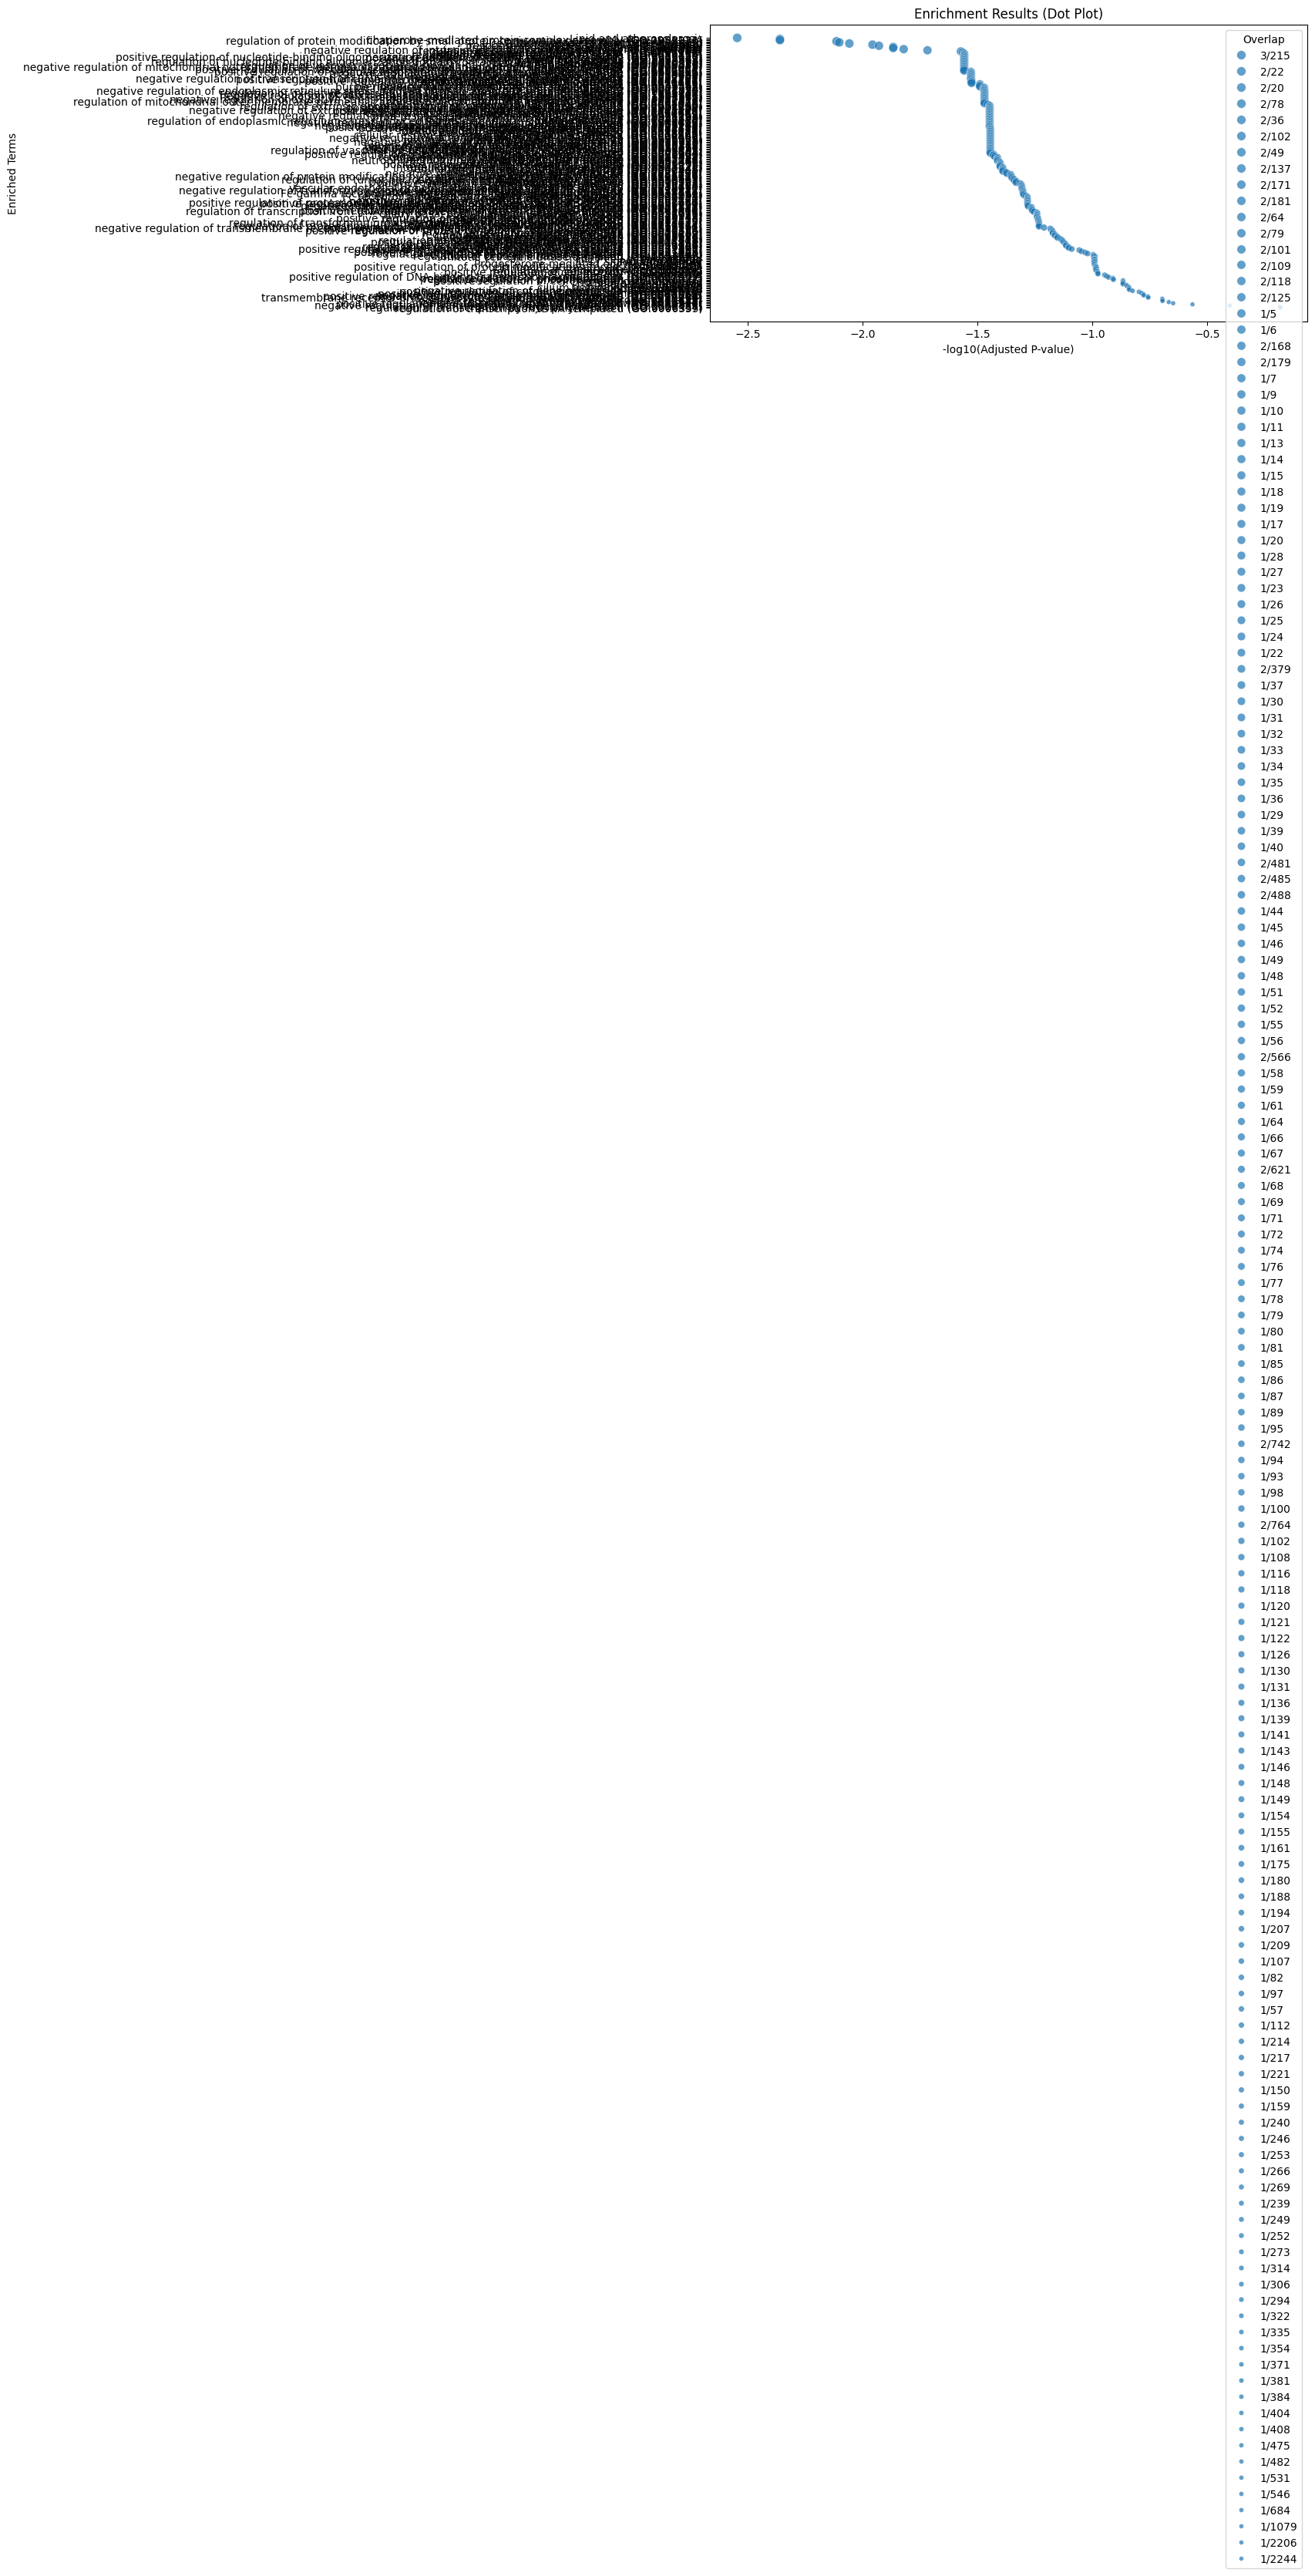

In [21]:
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Enrichr results
df = pd.read_csv("/Users/mennayoussef/Downloads/enrichr_enrichment_results.csv")

# Sort by adjusted p-value (smallest first)
df = df.sort_values(by="Adjusted P-value")

# Select top 10 pathways
top_terms = df.head(10)

# **Bar Plot for Enrichment Scores**
plt.figure(figsize=(10, 5))
sns.barplot(x=-top_terms["Adjusted P-value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["Term"], palette="viridis")
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel("Enriched Terms")
plt.title("Top 10 Enriched Pathways (Enrichr)")
plt.show()

# **Dot Plot**
plt.figure(figsize=(10, 5))
sns.scatterplot(x=-df["Adjusted P-value"].apply(lambda x: -1 * np.log10(x)), y=df["Term"], size=df["Overlap"], alpha=0.7)
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel("Enriched Terms")
plt.title("Enrichment Results (Dot Plot)")
plt.show()


In [1]:
import requests
import pandas as pd

# List of Ensembl gene IDs
gene_list = [
    "ENSG00000188641",
    "ENSG00000230876",
    "ENSG00000168675",
    "ENSG00000120594",
    "ENSG00000096060",
    "ENSG00000163694",
    "ENSG00000145819",
    "ENSG00000169554",
    "ENSG00000168214",
    "ENSG00000133121",
    "ENSG00000184384",
    "ENSG00000155849",
    "ENSG00000114541",
    "ENSG00000181804",
    "ENSG00000128512",
    "ENSG00000230590",
    "ENSG00000104447"
]

# g:Profiler API endpoint
url = "https://biit.cs.ut.ee/gprofiler/api/gost/profile/"

# Request payload
payload = {
    "organism": "hsapiens",  # Human
    "query": gene_list,
    "sources": ["GO:BP", "KEGG", "REAC"],  # Gene Ontology (BP), KEGG, Reactome
    "user_threshold": 0.05,  # p-value cutoff
}

# Make API request
response = requests.post(url, json=payload)

# Check response
if response.status_code == 200:
    data = response.json()["result"]
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Save to CSV
    df.to_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_sex_results_cls0.csv", index=False)
    
    # Display top results
    print(df.head())

else:
    print("Error:", response.status_code, response.text)


                                         description  effective_domain_size  \
0  "The activation of transcription of specific g...                  21017   
1  NOTCH2 intracellular domain regulates transcri...                  10916   
2                    RUNX3 regulates NOTCH signaling                  10916   
3  Regulation of gene expression in late stage (b...                  10916   
4                                       Gastrulation                  10916   

   goshv  intersection_size  \
0  12924                  2   
1  42768                  2   
2  43168                  2   
3  43271                  2   
4  42274                  3   

                                       intersections  \
0  [[], [], [], [], [], [], [], [], [IDA, IEA], [...   
1  [[], [], [], [], [], [], [], [], [REAC], [], [...   
2  [[], [], [], [], [], [], [], [], [REAC], [], [...   
3  [[], [], [], [], [], [], [], [], [REAC], [], [...   
4  [[], [], [], [], [], [], [], [REAC], [REAC], [...   

 

/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_64862/4270656260.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")


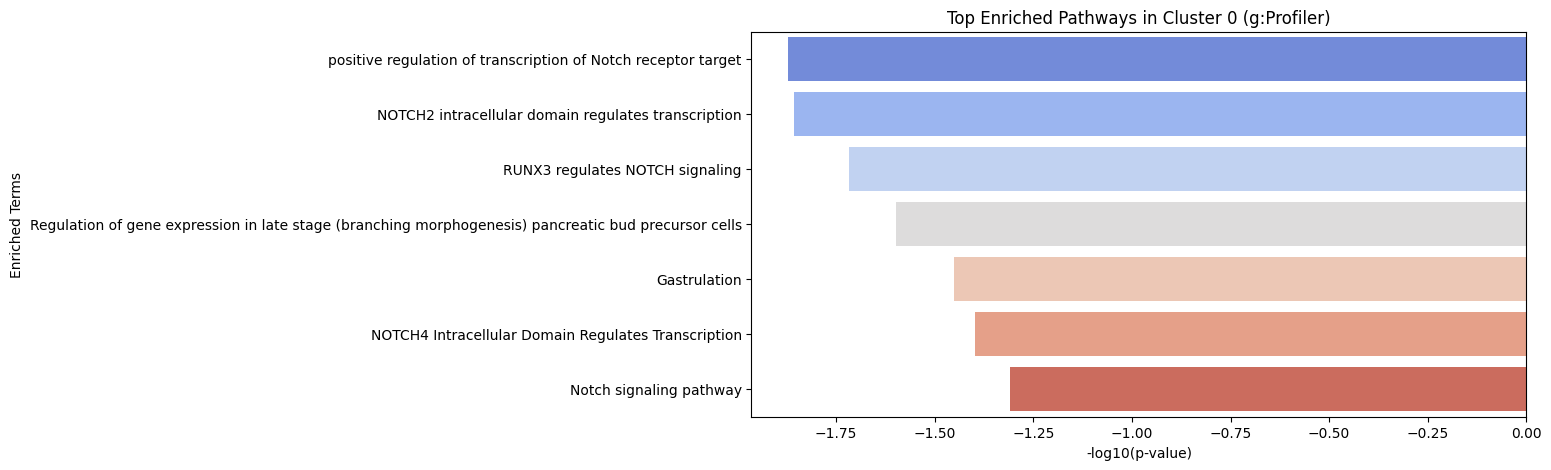

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load g:Profiler results
df = pd.read_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_sex_results_cls0.csv")

# Sort by adjusted p-value (smallest first)
df = df.sort_values(by="p_value")

# Select top 10 terms
top_terms = df.head(20)

# **Bar Plot for Top Enriched Terms**
plt.figure(figsize=(10, 5))
sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")
plt.xlabel("-log10(p-value)")
plt.ylabel("Enriched Terms")
plt.title("Top Enriched Pathways in Cluster 0 (g:Profiler)")
plt.show()

In [4]:
import requests
import pandas as pd

# List of Ensembl gene IDs
gene_list = [
    "ENSG00000205542",
    "ENSG00000087086",
    "ENSG00000167996",
    "ENSG00000075624",
    "ENSG00000034510",
    "ENSG00000196154",
    "ENSG00000109475",
    "ENSG00000122026",
    "ENSG00000167526",
    "ENSG00000137818",
    "ENSG00000164587",
    "ENSG00000197956",
    "ENSG00000115268",
    "ENSG00000177954",
    "ENSG00000198918",
    "ENSG00000105372",
    "ENSG00000105640",
    "ENSG00000092841"
]

# g:Profiler API endpoint
url = "https://biit.cs.ut.ee/gprofiler/api/gost/profile/"

# Request payload
payload = {
    "organism": "hsapiens",  # Human
    "query": gene_list,
    "sources": ["GO:BP", "KEGG", "REAC"],  # Gene Ontology (BP), KEGG, Reactome
    "user_threshold": 0.05,  # p-value cutoff
}

# Make API request
response = requests.post(url, json=payload)

# Check response
if response.status_code == 200:
    data = response.json()["result"]
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Save to CSV
    df.to_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_sex_results_cls1.csv", index=False)
    
    # Display top results
    print(df.head())

else:
    print("Error:", response.status_code, response.text)


                          description  effective_domain_size  goshv  \
0              Viral mRNA Translation                  10916  43884   
1            Peptide chain elongation                  10916  42957   
2  Eukaryotic Translation Termination                  10916  42106   
3            Selenocysteine synthesis                  10916  43422   
4   Eukaryotic Translation Elongation                  10916  42104   

   intersection_size                                      intersections  \
0                 10  [[], [], [], [], [], [], [REAC], [REAC], [REAC...   
1                 10  [[], [], [], [], [], [], [REAC], [REAC], [REAC...   
2                 10  [[], [], [], [], [], [], [REAC], [REAC], [REAC...   
3                 10  [[], [], [], [], [], [], [REAC], [REAC], [REAC...   
4                 10  [[], [], [], [], [], [], [REAC], [REAC], [REAC...   

                                 name              native       p_value  \
0              Viral mRNA Translation   REAC:R-

/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_64862/4274335866.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")


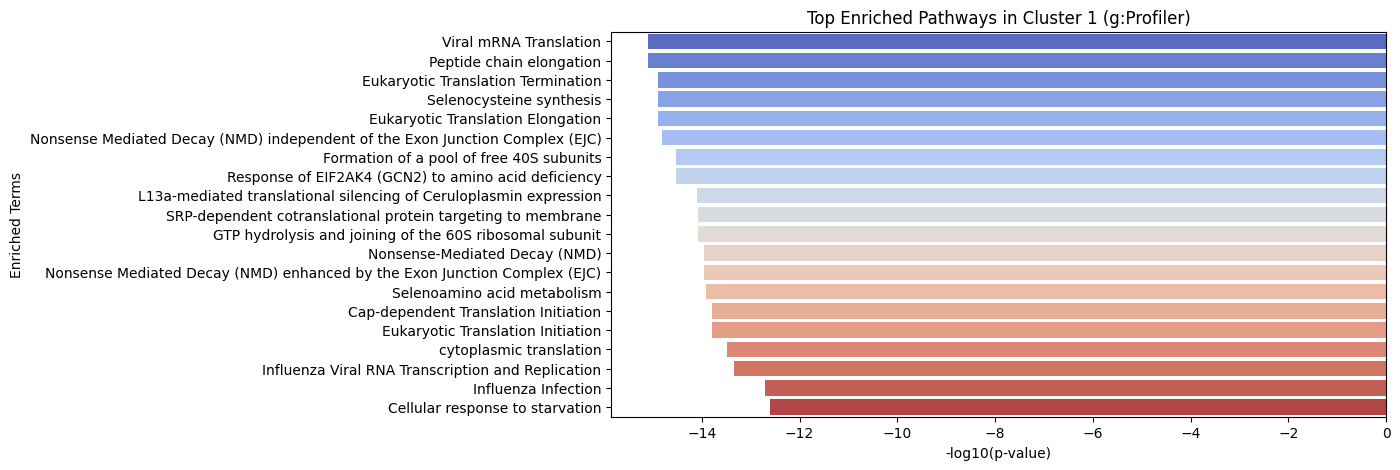

In [5]:

# Load g:Profiler results
df = pd.read_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_sex_results_cls1.csv")

# Sort by adjusted p-value (smallest first)
df = df.sort_values(by="p_value")

# Select top 10 terms
top_terms = df.head(20)

# **Bar Plot for Top Enriched Terms**
plt.figure(figsize=(10, 5))
sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")
plt.xlabel("-log10(p-value)")
plt.ylabel("Enriched Terms")
plt.title("Top Enriched Pathways in Cluster 1 (g:Profiler)")
plt.show()

In [6]:
import requests
import pandas as pd

# List of Ensembl gene IDs
gene_list = [
    "ENSG00000228253",
    "ENSG00000197943",
    "ENSG00000198840",
    "ENSG00000165168",
    "ENSG00000212907",
    "ENSG00000120063",
    "ENSG00000198786",
    "ENSG00000131503",
    "ENSG00000265681",
    "ENSG00000217128",
    "ENSG00000166927",
    "ENSG00000185883",
    "ENSG00000164733",
    "ENSG00000026297",
    "ENSG00000127951",
    "ENSG00000137462"
]

# g:Profiler API endpoint
url = "https://biit.cs.ut.ee/gprofiler/api/gost/profile/"

# Request payload
payload = {
    "organism": "hsapiens",  # Human
    "query": gene_list,
    "sources": ["GO:BP", "KEGG", "REAC"],  # Gene Ontology (BP), KEGG, Reactome
    "user_threshold": 0.05,  # p-value cutoff
}

# Make API request
response = requests.post(url, json=payload)

# Check response
if response.status_code == 200:
    data = response.json()["result"]
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Save to CSV
    df.to_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_sex_results_cls2.csv", index=False)
    
    # Display top results
    print(df.head())

else:
    print("Error:", response.status_code, response.text)


                                         description  effective_domain_size  \
0  "The chemical reactions and pathways resulting...                  21017   
1  "The chemical reactions and pathways resulting...                  21017   
2  "The chemical reactions and pathways resulting...                  21017   
3  "The chemical reactions and pathways resulting...                  21017   
4  "The chemical reactions and pathways resulting...                  21017   

   goshv  intersection_size  \
0  15211                  5   
1  12600                  5   
2  13521                  5   
3  13461                  5   
4  13516                  5   

                                       intersections  \
0  [[IDA, NAS, IEA], [], [NAS], [], [NAS], [], [N...   
1  [[IDA, NAS, IEA], [], [NAS], [], [NAS], [], [N...   
2  [[IDA, NAS, IEA], [], [NAS], [], [NAS], [], [N...   
3  [[IDA, NAS, IEA], [], [NAS], [], [NAS], [], [N...   
4  [[IDA, NAS, IEA], [], [NAS], [], [NAS], [], [N...   

 

/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_64862/3783424336.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")


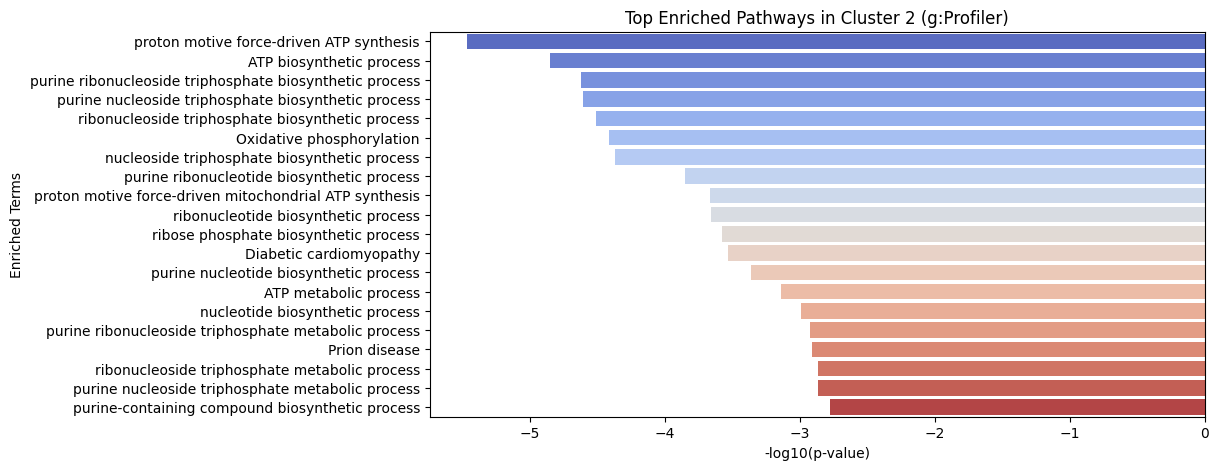

In [7]:
# Load g:Profiler results
df = pd.read_csv("/Users/mennayoussef/Downloads/gprofiler_enrichment_sex_results_cls2.csv")

# Sort by adjusted p-value (smallest first)
df = df.sort_values(by="p_value")

# Select top 10 terms
top_terms = df.head(20)

# **Bar Plot for Top Enriched Terms**
plt.figure(figsize=(10, 5))
sns.barplot(x=-top_terms["p_value"].apply(lambda x: -1 * np.log10(x)), y=top_terms["name"], palette="coolwarm")
plt.xlabel("-log10(p-value)")
plt.ylabel("Enriched Terms")
plt.title("Top Enriched Pathways in Cluster 2 (g:Profiler)")
plt.show()